In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,NaN,0.0,23.3,NaN,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,NaN,NaN
4,0.0,137.0,40.0,NaN,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,NaN,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,NaN,0.245,NaN
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	95
float64		column 2	57
float64		column 3	57
float64		column 4	114
float64		column 5	38
float64		column 6	57
float64		column 7	76
float64		column 8	114


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,673.000000,711.000000,711.000000,654.000000,730.000000,711.000000,692.000000,654.000000
mean,3.791976,120.611814,68.966245,20.770642,78.413699,32.081435,0.467553,33.048930
std,3.283453,31.693534,18.647025,15.458268,112.262095,7.829055,0.330997,11.372735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.450000,0.242500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.550000,0.602000,40.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,72.000000


<AxesSubplot:>

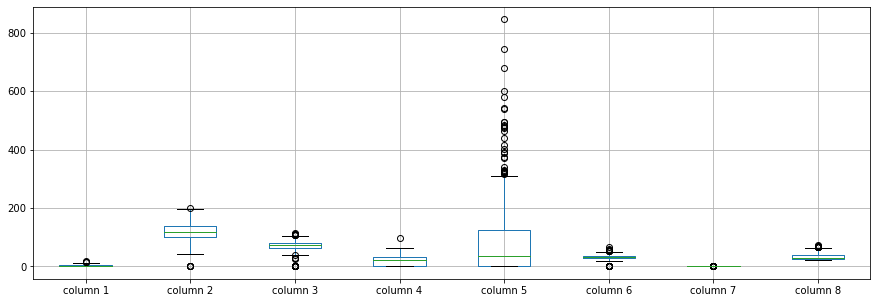

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.791976
column 2    120.611814
column 3     68.966245
column 4     20.770642
column 5     78.413699
column 6     32.081435
column 7      0.467553
column 8     33.048930
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.154881,0.165124,-0.054943,-0.046388,-0.015950,-0.064124,0.506832
column 2,0.154881,1.000000,0.146605,0.054424,0.332509,0.197647,0.140659,0.249281
column 3,0.165124,0.146605,1.000000,0.189862,0.087744,0.297077,0.033097,0.229588
column 4,-0.054943,0.054424,0.189862,1.000000,0.432367,0.360217,0.202662,-0.078595
column 5,-0.046388,0.332509,0.087744,0.432367,1.000000,0.190100,0.210065,-0.009530
column 6,-0.015950,0.197647,0.297077,0.360217,0.190100,1.000000,0.152912,0.046371
column 7,-0.064124,0.140659,0.033097,0.202662,0.210065,0.152912,1.000000,0.029573
column 8,0.506832,0.249281,0.229588,-0.078595,-0.009530,0.046371,0.029573,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+8,8+8+8,8+8+8+8,8+8+8+8+8,8+8+8+8+8+8,8+8+8+8+8+8+8,8+8+8+8+8+8,8+8+8+8+8,8+8+8+8,8+8+8,8+8,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 393.18520100911456
Epoch: 1 , loss: 390.3628412882487
Epoch: 2 , loss: 389.85706520080566
Epoch: 3 , loss: 390.5884838104248
Epoch: 4 , loss: 390.25248463948566
Epoch: 5 , loss: 389.8621317545573
Epoch: 6 , loss: 389.720760345459
Epoch: 7 , loss: 388.40711339314777
Epoch: 8 , loss: 390.1447861989339
Epoch: 9 , loss: 387.5214049021403
Epoch: 10 , loss: 387.6439723968506
Epoch: 11 , loss: 386.3222713470459
Epoch: 12 , loss: 385.5610122680664
Epoch: 13 , loss: 384.702885945638
Epoch: 14 , loss: 380.31030146280926
Epoch: 15 , loss: 374.5774631500244
Epoch: 16 , loss: 368.0890426635742
Epoch: 17 , loss: 364.11694780985516
Epoch: 18 , loss: 356.0749289194743
Epoch: 19 , loss: 351.5689519246419
Epoch: 20 , loss: 347.9398314158122
Epoch: 21 , loss: 344.2916742960612
Epoch: 22 , loss: 343.1260401407878
Epoch: 23 , loss: 341.1970329284668
Epoch: 24 , loss: 338.7692108154297
Epoch: 25 , loss: 338.6444460550944
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    84.000000
column 4     0.000000
column 5     0.295583
column 6    35.400000
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.0,0.000000,0.123746,0.000000,0.000000,-49.873249
1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.166231,0.000000,0.000000,-0.514648,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.006394,-20.827643
4,0.000000,0.0,0.0,-34.791125,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
764,-1.832214,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
765,0.000000,0.0,0.0,0.000000,0.000000,-25.956801,0.000000,-29.759886
766,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1722.6924420955568, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.29822032426934214

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.0,72.0,35.000000,0.123746,33.600000,0.627000,0.126751
1,1.000000,85.0,66.0,29.000000,0.000000,26.600000,0.351000,31.000000
2,8.000000,183.0,64.0,0.166231,0.000000,23.300000,0.157352,32.000000
3,1.000000,89.0,66.0,23.000000,94.000000,28.100000,0.160606,0.172357
4,0.000000,137.0,40.0,0.208875,168.000000,43.100000,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.900000,0.171000,63.000000
764,0.167786,122.0,70.0,27.000000,0.000000,36.800000,0.340000,27.000000
765,5.000000,121.0,72.0,23.000000,112.000000,0.243199,0.245000,0.240114
766,1.000000,126.0,60.0,0.000000,0.000000,30.100000,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_NE_10.xlsx", index=False, header=False)